In [43]:
from vnstock import *
import datetime
from vnstock.chart import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import numpy as np



Getting stock historical data

In [6]:
#try on one stock
df_VIC  =  stock_historical_data(symbol='VIC', 
                            start_date="2021-01-01", 
                            end_date=str(today), resolution='1D', type='stock', beautify=True)
df_VIC = df_VIC[['time','close']]
df_VIC.rename(columns={'time':'date','close':'VIC'},inplace=True)
df_VIC

,date,VIC
0,2021-01-04,95989
1,2021-01-05,97500
2,2021-01-06,97944
3,2021-01-07,97855
4,2021-01-08,99366
...,...,...
692,2023-10-12,46500
693,2023-10-13,46100
694,2023-10-16,45000
695,2023-10-17,44000


In [7]:
#create a DataFrame consist of other companies
def companies_close_price(*company_list):
    for i in range(len(company_list)):
        df_sub = stock_historical_data(symbol=company_list[i], 
                                start_date="2021-01-01", 
                                end_date=str(today), resolution='1D', type='stock', beautify=True)
        df_sub = df_sub[['time','close']]
        df_sub.rename(columns={'time':'date','close':company_list[i]},inplace=True)
        if i==0:
            df = df_sub
        else:
            df = pd.merge(df,df_sub,on='date')
    return df

In [8]:
company_list = ['VIC','VHM','FPT','MBS']
df = companies_close_price('VIC','VHM','FPT','MBS')
df

,date,VIC,VHM,FPT,MBS
0,2021-01-04,95989,67840,35560,8430
1,2021-01-05,97500,70490,37050,8490
2,2021-01-06,97944,69900,36880,9310
3,2021-01-07,97855,69900,36930,10250
4,2021-01-08,99366,71080,37410,10300
...,...,...,...,...,...
706,2023-10-12,46500,47550,96400,23200
707,2023-10-13,46100,46900,96100,22900
708,2023-10-16,45000,45550,96800,22000
709,2023-10-17,44000,44500,93100,20400


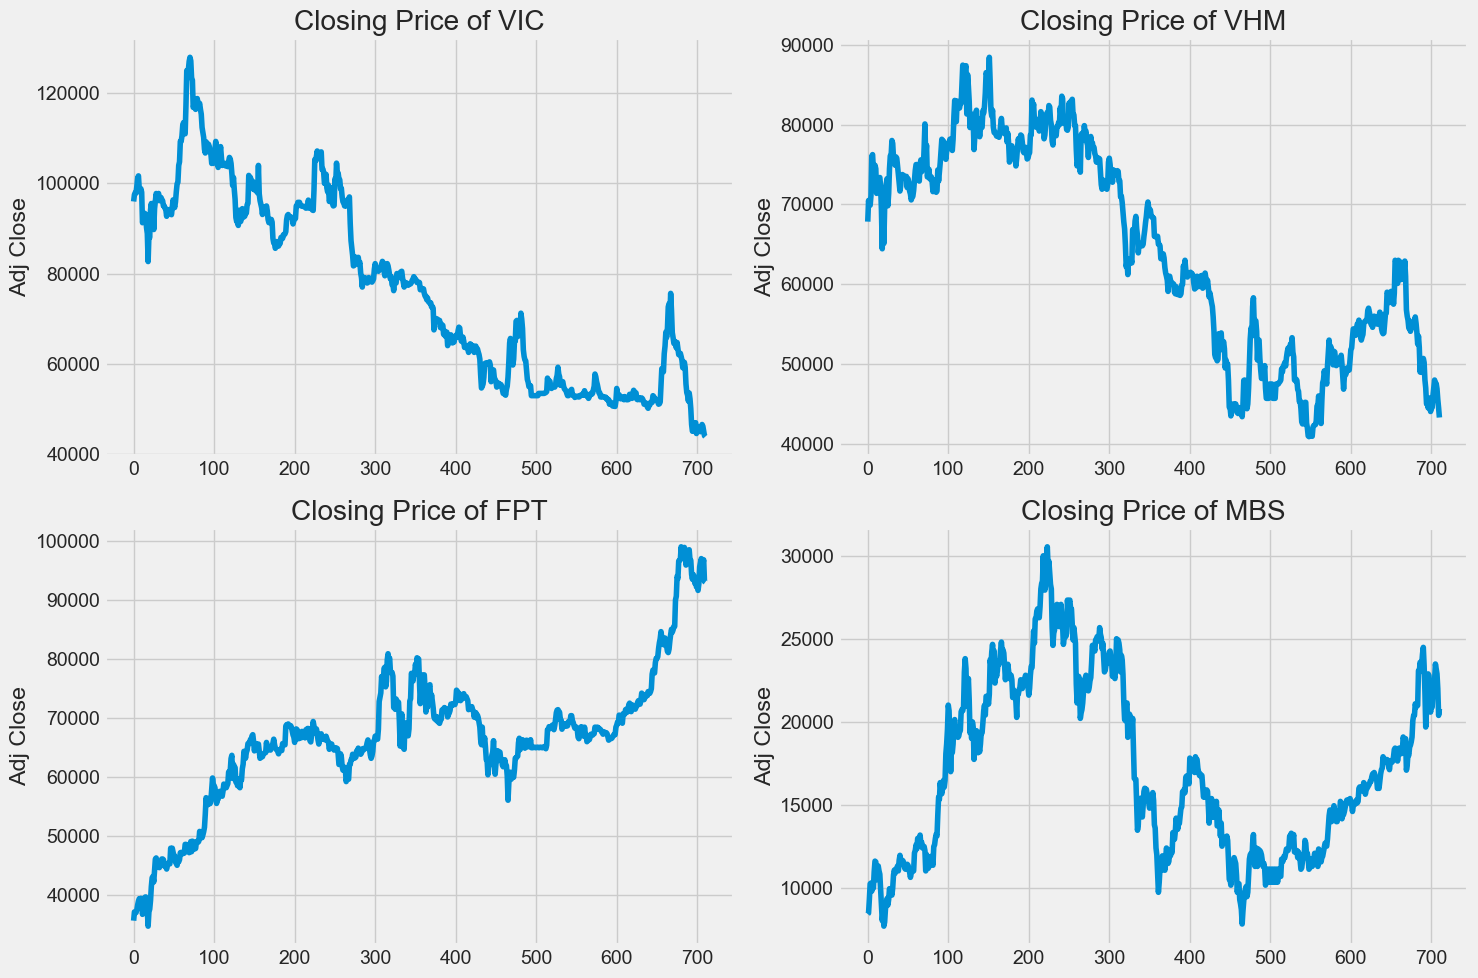

In [9]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    df[company].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_list[i - 1]}")
    
plt.tight_layout()

Moving average 20-50-200

In [10]:
df_VIC = stock_historical_data("VIC", "2022-01-01", str(today), "1D", "stock")
fig = candlestick_chart(df_VIC, ma_periods=[20,50,200], show_volume=False, reference_period=300, figure_size=(15, 8), 
                        title='VIC - Candlestick Chart with MA and Volume', x_label='Date', y_label='Price', 
                        colors=('lightgray', 'gray'), reference_colors=('black', 'blue'))
fig.show()

Daily return

In [11]:
df_VIC  =  stock_historical_data(symbol='VIC', 
                            start_date="2021-01-01", 
                            end_date=str(today), resolution='1D', type='stock', beautify=True)
df_VIC = df_VIC[['time','close']]
df_VIC.rename(columns={'time':'date','close':'VIC'},inplace=True)
df_VIC    

,date,VIC
0,2021-01-04,95989
1,2021-01-05,97500
2,2021-01-06,97944
3,2021-01-07,97855
4,2021-01-08,99366
...,...,...
692,2023-10-12,46500
693,2023-10-13,46100
694,2023-10-16,45000
695,2023-10-17,44000


In [12]:
def daily_return(df):
    df_daily_return = pd.DataFrame(df['date'])
    for company in df.columns[1:]:
        new_list = [0]
        for i in range(1,len(df)):
            new_list.append(round((df[company][i]/df[company][i-1] - 1)*100,2))
        df_daily_return[company] = new_list
    return df_daily_return

In [13]:
df_daily_return = daily_return(df)
df_daily_return

,date,VIC,VHM,FPT,MBS
0,2021-01-04,0.00,0.00,0.00,0.00
1,2021-01-05,1.57,3.91,4.19,0.71
2,2021-01-06,0.46,-0.84,-0.46,9.66
3,2021-01-07,-0.09,0.00,0.14,10.10
4,2021-01-08,1.54,1.69,1.30,0.49
...,...,...,...,...,...
706,2023-10-12,2.31,0.32,-0.62,-1.28
707,2023-10-13,-0.86,-1.37,-0.31,-1.29
708,2023-10-16,-2.39,-2.88,0.73,-3.93
709,2023-10-17,-2.22,-2.31,-3.82,-7.27


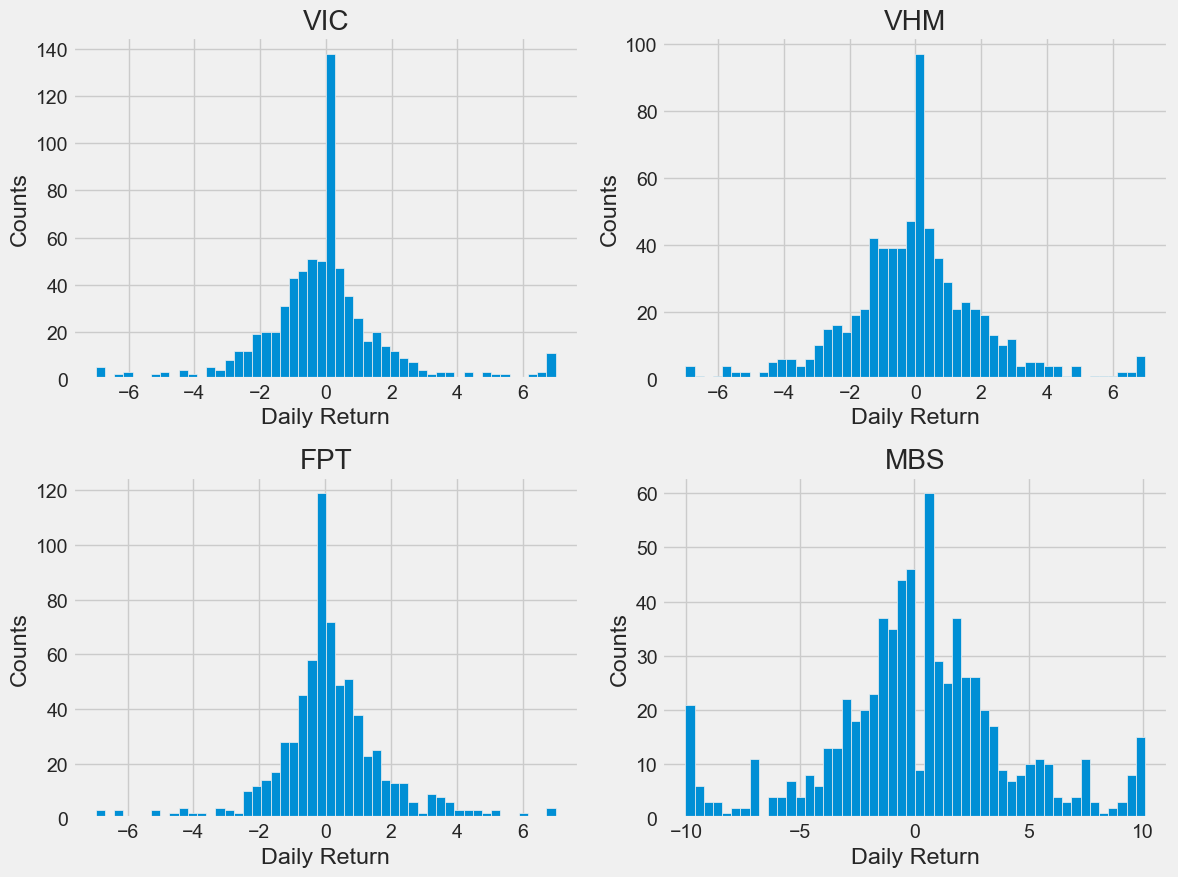

In [14]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    df_daily_return[company].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company}')
    
plt.tight_layout()

Variance, Standard deviation and Sharpe ratio

In [15]:
def variance(symbols, start_date, end_date):
    df =  stock_historical_data(symbol=symbols, 
                            start_date=start_date, 
                            end_date=end_date, resolution='1D', type='stock', beautify=True)
    df = df[['time','close']]
    df.rename(columns={'time':'date','close':symbols},inplace=True)
    df_daily_return = daily_return(df)
    mean = np.mean(df_daily_return[symbols])
    squared_deviations_from_mean = [(integer - mean)**2 for integer in df_daily_return[symbols]]
    variances = np.mean(squared_deviations_from_mean)
    return variances
def std_dev(symbols, start_date, end_date):
    return variance(symbols, start_date, end_date)**1/2
def mean_daily_return(symbols, start_date, end_date):
    df =  stock_historical_data(symbol=symbols, 
                            start_date=start_date, 
                            end_date=end_date, resolution='1D', type='stock', beautify=True)
    df = df[['time','close']]
    df.rename(columns={'time':'date','close':symbols},inplace=True)
    df_daily_return = daily_return(df)
    return np.mean(df_daily_return[symbols])

In [27]:
import datetime

date_object = datetime.date.today()
one_year_past_date = str(date_object - datetime.timedelta(days=365))
print(one_year_past_date)


2022-10-19


In [48]:
import datetime

today_ = datetime.date.today()
one_year_past_date = str(today_ - datetime.timedelta(days=365))
today_ = str(today_)
company_list = ['VIC','VHM','FPT','MBS','VRE','VGI','HSG','HPG']


std = []
mean = []
for company in company_list:
    std.append(std_dev(company,one_year_past_date,today_))
    mean.append(mean_daily_return(company,one_year_past_date,today_))

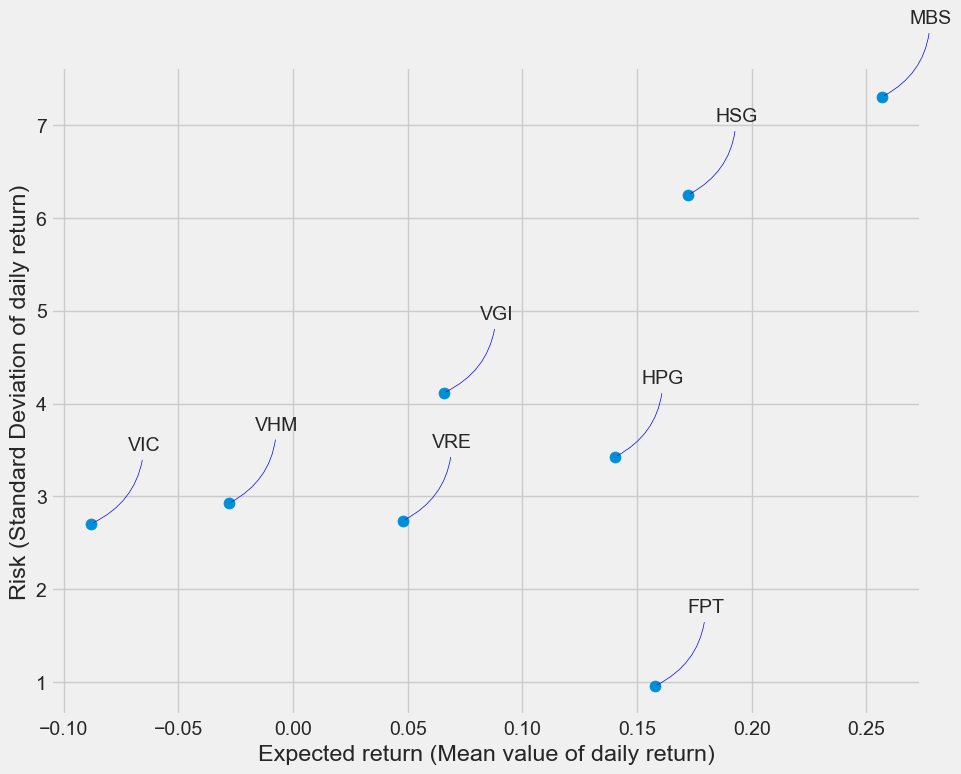

In [49]:
area = np.pi * 20
plt.figure(figsize=(10, 8))
plt.scatter(mean, std, s=area)
plt.xlabel('Expected return (Mean value of daily return)')
plt.ylabel('Risk (Standard Deviation of daily return)')

for label, x, y in zip(company_list, mean, std):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

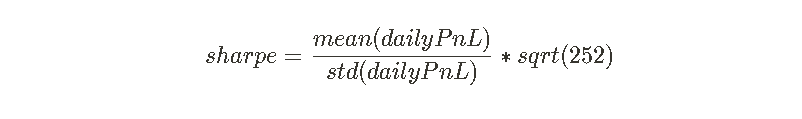

Return a sharpe ratio base only on the daily return (no strategy included)

In [50]:
def sharpe(symbols):
    today_ = datetime.date.today()
    one_year_past_date = str(today_ - datetime.timedelta(days=365))
    today_ = str(today_)
    std = std_dev(company,one_year_past_date,today_)
    mean = mean_daily_return(company,one_year_past_date,today_)
    return (mean/std)*(252**1/2)

In [52]:
for company in company_list:
    print(f"Sharpe ratio of {company}: ", sharpe(company))

Sharpe ratio of VIC:  -4.106928921013578
Sharpe ratio of VHM:  -1.2102131344956097
Sharpe ratio of FPT:  20.7727520984108
Sharpe ratio of MBS:  4.4285079332722015
Sharpe ratio of VRE:  2.19766171790132
Sharpe ratio of VGI:  2.009408310431251
Sharpe ratio of HSG:  3.4711139502320596
Sharpe ratio of HPG:  5.160903592164884
